<a href="https://colab.research.google.com/github/LeakeyMokaya/Data-Analysis-Projects/blob/main/Data_Analysis_of_Netflix_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LIBRARIES
library(dplyr)
library(tidyr)
library(lubridate)
#library(zoo)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# READING DATA FROM CSV DOWNLOADED FROM NETFLIX ACCOUNT
minetflix <- read.csv("NetflixViewingHistory.csv") 
str(minetflix)
minetflix$Date <- dmy(minetflix$Date)

'data.frame':	3868 obs. of  2 variables:
 $ Title: chr  "Polar" "RRR (Hindi)" "Shameless (U.S.): Season 11: Frances Francis Franny Frank" "Shameless (U.S.): Season 11: Go Home, Gentrifier!" ...
 $ Date : chr  "24/5/22" "24/5/22" "23/5/22" "22/5/22" ...


In [3]:
# SEPARATE TITLE COLUMN IN TITLE OF TV SERIES, SEASON AND EPISODE TITLE
minetflix_serie <- minetflix %>%
  separate(col = Title, into = c("title", "temporada", "titulo_episodio"), sep = ': ')
# REMOVE OCCURRENCES WHERE SEASON AND EPISODE ARE EMPTY (BECAUSE THEY ARE NOT TV SERIES)
minetflix_serie <- minetflix_serie[!is.na(minetflix_serie$temporada),]
minetflix_serie <- minetflix_serie[!is.na(minetflix_serie$titulo_episodio),]# REGISTRO DE NÚMERO DE EPISODIOS VISTOS POR DÍA, POR SERIE
maratones_minetflix <- minetflix_serie %>%
  count(title, Date)
# LET'S CONSIDER "BINGE-WATCHING" 6 OR MORE EPISODES PER DAY AND SORT BY DATE
maratones_minetflix <- maratones_minetflix[maratones_minetflix$n >= 6,]
maratones_minetflix
maratones_minetflix <- maratones_minetflix[order(maratones_minetflix$Date),]
maratones_minetflix

Warning message:
“Expected 3 pieces. Additional pieces discarded in 381 rows [9, 61, 62, 82, 100, 106, 111, 268, 275, 276, 312, 359, 360, 361, 362, 363, 364, 380, 382, 387, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 983 rows [1, 2, 7, 8, 10, 13, 14, 17, 28, 29, 33, 34, 35, 36, 37, 43, 44, 45, 49, 52, ...].”


,title,Date,n
,<chr>,<date>,<int>
5,13 Reasons Why,2017-11-21,10
16,72 Dangerous Animals,2019-02-09,7
21,Addicted to Food,2019-01-24,8
57,Arrested Development,2020-07-30,7
58,Arrow,2018-01-26,7
78,Black Mirror,2018-05-08,6
111,Botched Up Bodies,2019-02-14,8
184,Dangerous Persuasions,2018-07-29,9
187,Dark,2019-06-16,6


,title,Date,n
,<chr>,<date>,<int>
5,13 Reasons Why,2017-11-21,10
847,The 100,2017-11-30,6
720,Shadowhunters,2017-12-12,15
721,Shadowhunters,2017-12-13,8
524,Marvel's Daredevil,2018-01-03,10
528,Marvel's Daredevil,2018-01-10,6
58,Arrow,2018-01-26,7
1153,Wild Wild Country,2018-03-25,6
78,Black Mirror,2018-05-08,6


Selecting by n


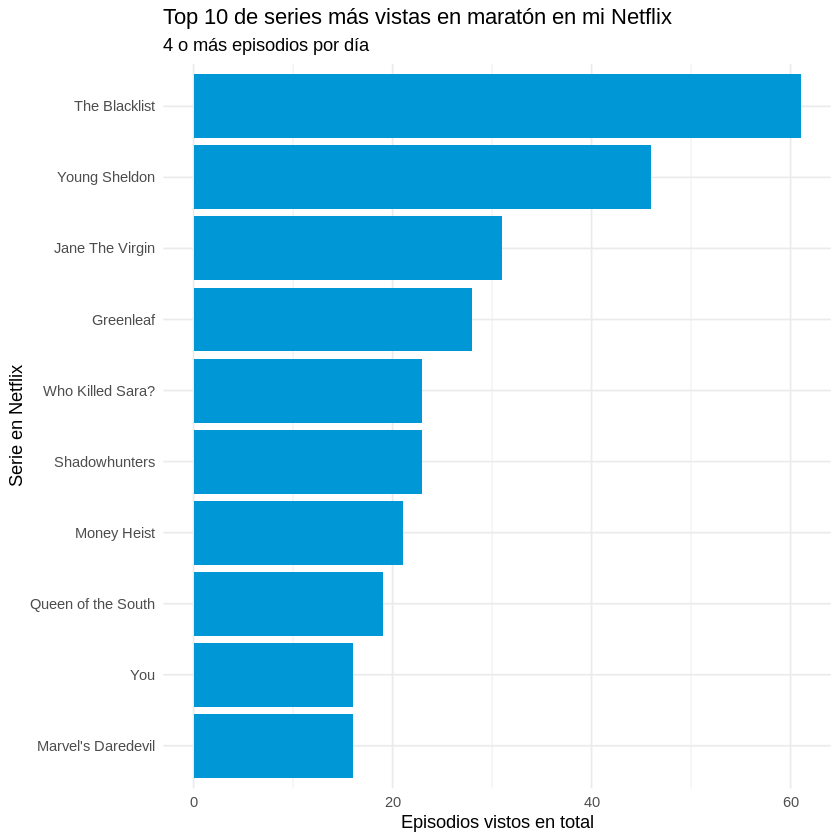

In [4]:
# GROUPING DATA BY TV SERIES TITLE AND SORTING BY NUMBER OF EPISODES VIEWED
maratones_minetflix_todas <- maratones_minetflix %>% 
  group_by(title) %>% 
  summarise(n = sum(n)) %>%
  arrange(desc(n))
# PLOTTING TOP 10 OF BINGE-WATCHING TV SERIES
maratones_minetflix_top <- maratones_minetflix_todas %>% 
  top_n(10) %>%
  ggplot(aes(x = reorder(title, n), y = n)) +
  geom_col(fill = "#0097d6") +
  coord_flip() +
  ggtitle("Top 10 de series más vistas en maratón en mi Netflix", "4 o más episodios por día") +
  labs(x = "Serie en Netflix", y = "Episodios vistos en total") +
  theme_minimal()
maratones_minetflix_top
#ggplotly()

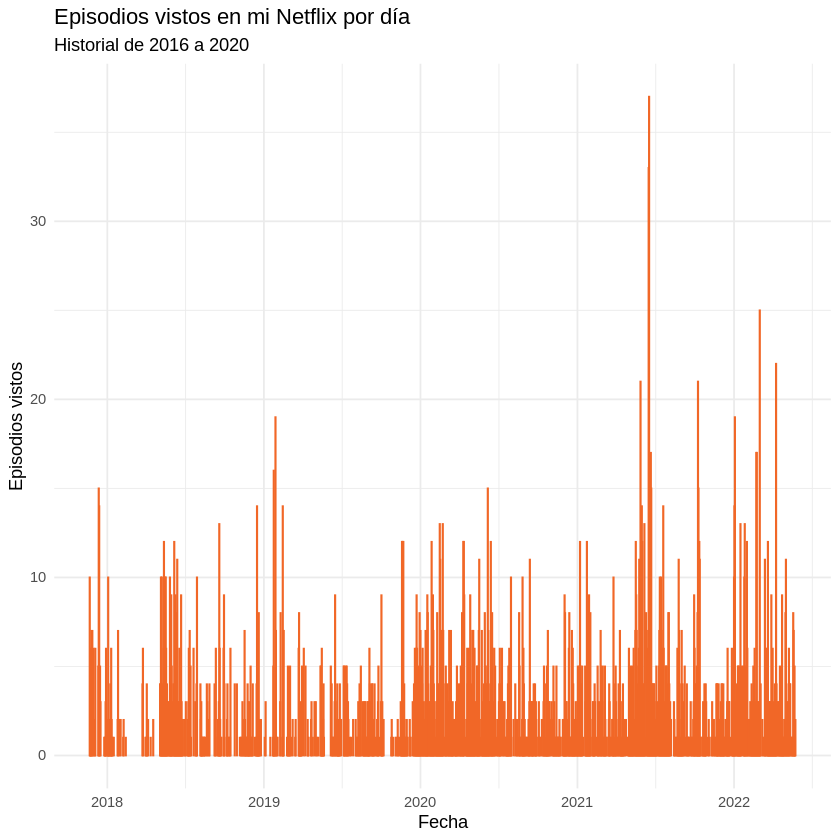

In [5]:

# EPISODES PER DAY
netflix_episodios_dia <- minetflix %>%
  count(Date) %>%
  arrange(desc(n))
# PLOTTING EPISODES PER DAY
netflix_episodios_dia_plot <- ggplot(aes(x = Date, y = n, color = n), data = netflix_episodios_dia) +
  geom_col(color = c("#f16727")) +
  theme_minimal() +
  ggtitle("Episodios vistos en mi Netflix por día", "Historial de 2016 a 2020") +
  labs(x = "Fecha", y = "Episodios vistos") 
netflix_episodios_dia_plot


Warning message:
“Use of `netflix_episodios_dia$n` is discouraged. Use `n` instead.”


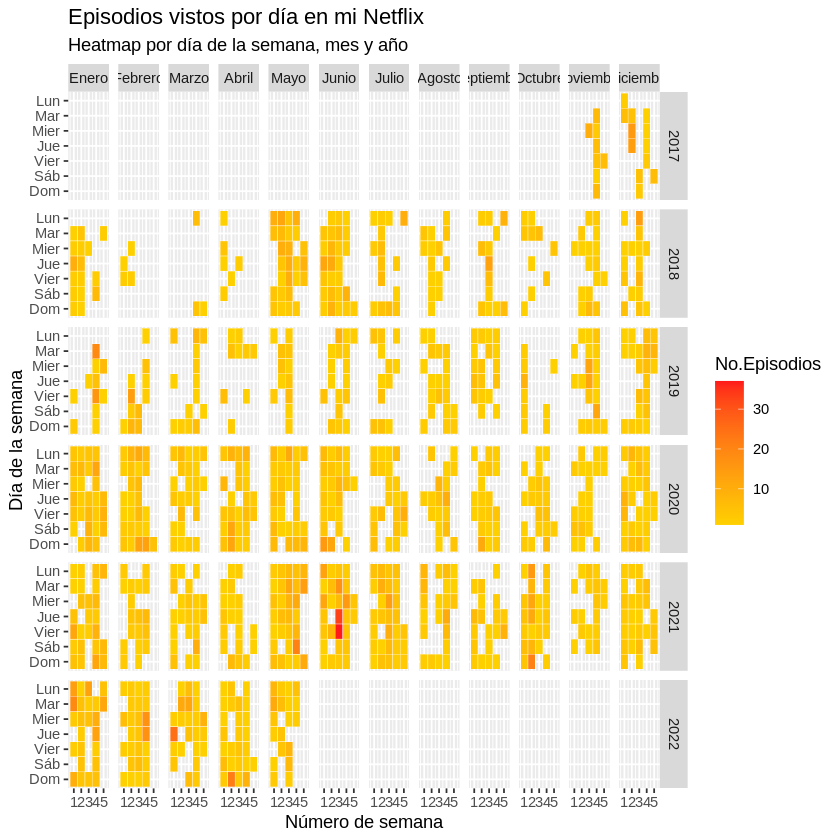

In [10]:
# CALENDAR WITH NUMBER OF EPISODES SEEN PER DAY IN HEATMAP
netflix_episodios_dia <- netflix_episodios_dia[order(netflix_episodios_dia$Date),]
netflix_episodios_dia$diasemana <- wday(netflix_episodios_dia$Date)
netflix_episodios_dia$diasemanaF <- weekdays(netflix_episodios_dia$Date, abbreviate = T)
netflix_episodios_dia$mesF <- months(netflix_episodios_dia$Date, abbreviate = T)
# YOU DON'T NEED TO RENAME NECESSARILY IN SPANISH DAYS OF THE WEEK AND MONTHS
netflix_episodios_dia$diasemanaF <-factor(netflix_episodios_dia$diasemana, levels = rev(1:7), labels = rev(c("Lun","Mar","Mier","Jue","Vier","Sáb","Dom")),ordered = TRUE)
netflix_episodios_dia$mesF <- factor(month(netflix_episodios_dia$Date),levels = as.character(1:12), labels = c("Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"),ordered = TRUE)
#netflix_episodios_dia$añomes <- factor(as.yearmon(netflix_episodios_dia$Date)) 
netflix_episodios_dia$semana <- as.numeric(format(netflix_episodios_dia$Date,"%W"))
netflix_episodios_dia$semanames <- ceiling(day(netflix_episodios_dia$Date) / 7)
netflix_episodios_dia_calendario <- ggplot(netflix_episodios_dia, aes(semanames, diasemanaF, fill = netflix_episodios_dia$n)) + 
  geom_tile(colour = "white") + 
  facet_grid(year(netflix_episodios_dia$Date) ~ mesF) + 
  scale_fill_gradient(low = "#FFD000", high = "#FF1919") + 
  ggtitle("Episodios vistos por día en mi Netflix", "Heatmap por día de la semana, mes y año") +
  labs(x = "Número de semana", y = "Día de la semana") +
  labs(fill = "No.Episodios")
netflix_episodios_dia_calendario

In [13]:
# FREQUENCY OF ACTIVITY IN MY NETFLIX ACCOUNT PER DAY
vista_dia <- netflix_episodios_dia %>%
  count(diasemanaF)
vista_diavista_dia_plot <- vista_dia %>% 
  ggplot(aes(diasemanaF, n)) +
  geom_col(fill = "#5b59d6") +
  coord_polar()  +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_text(face = "bold"),
        plot.title = element_text(size = 16, face = "bold")) +
  ggtitle("Frecuencia de episodios vistos", "Actividad por día de la semana en mi Netflix")
vista_dia_plot

ERROR: ignored